In [13]:
import numpy as np
import pandas as pd 
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [14]:
df = pd.read_csv('data/world_bank_development_indicators.csv')

In [15]:
df.head()

,country,date,agricultural_land%,forest_land%,land_area,avg_precipitation,trade_in_services%,control_of_corruption_estimate,control_of_corruption_std,access_to_electricity%,...,multidimensional_poverty_headcount_ratio%,gini_index,birth_rate,death_rate,life_expectancy_at_birth,population,rural_population,voice_and_accountability_estimate,voice_and_accountability_std,intentional_homicides
0,Afghanistan,1960-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,50.340,31.921,32.535,8622466.0,7898093.0,NaN,NaN,NaN
1,Afghanistan,1961-01-01,57.878356,NaN,652230.0,327.0,NaN,NaN,NaN,NaN,...,NaN,NaN,50.443,31.349,33.068,8790140.0,8026804.0,NaN,NaN,NaN
2,Afghanistan,1962-01-01,57.955016,NaN,652230.0,327.0,NaN,NaN,NaN,NaN,...,NaN,NaN,50.570,30.845,33.547,8969047.0,8163985.0,NaN,NaN,NaN
3,Afghanistan,1963-01-01,58.031676,NaN,652230.0,327.0,NaN,NaN,NaN,NaN,...,NaN,NaN,50.703,30.359,34.016,9157465.0,8308019.0,NaN,NaN,NaN
4,Afghanistan,1964-01-01,58.116002,NaN,652230.0,327.0,NaN,NaN,NaN,NaN,...,NaN,NaN,50.831,29.867,34.494,9355514.0,8458694.0,NaN,NaN,NaN


In [16]:
df.shape

(17272, 50)

In [17]:
df.describe()

,agricultural_land%,forest_land%,land_area,avg_precipitation,trade_in_services%,control_of_corruption_estimate,control_of_corruption_std,access_to_electricity%,renewvable_energy_consumption%,electric_power_consumption,...,multidimensional_poverty_headcount_ratio%,gini_index,birth_rate,death_rate,life_expectancy_at_birth,population,rural_population,voice_and_accountability_estimate,voice_and_accountability_std,intentional_homicides
count,14714.000000,8176.000000,1.493000e+04,10086.000000,9195.000000,4783.000000,4783.000000,7348.000000,8076.000000,7790.000000,...,455.000000,2108.000000,16037.000000,16019.000000,15866.000000,1.666500e+04,1.653900e+04,4850.000000,4850.000000,4209.000000
mean,36.945264,32.408397,5.078664e+06,1214.021416,20.998956,-0.024874,0.203572,80.758176,31.029558,2885.204630,...,27.058386,37.797249,28.203391,10.490354,64.254193,2.159737e+08,1.231026e+08,-0.021062,0.167144,8.035708
std,20.552401,23.355506,1.406167e+07,810.573031,23.260442,1.000047,0.087529,28.745226,29.858553,4103.108667,...,11.262910,8.835216,12.862546,5.358976,11.112156,7.102653e+08,4.087475e+08,0.998757,0.064188,12.026623
min,0.262821,0.000000,2.027000e+00,18.100000,0.621025,-1.936706,0.114062,0.533899,0.000000,5.548906,...,2.370000,20.700000,5.000000,0.795000,11.995000,2.646000e+03,0.000000e+00,-2.313395,0.102437,0.000000
25%,20.454545,12.430556,2.164000e+04,591.000000,8.678157,-0.791694,0.147978,68.435427,5.065460,375.934172,...,18.300000,31.200000,16.438000,6.976522,56.810602,9.940000e+05,4.295845e+05,-0.850328,0.126422,1.348194
50%,37.470745,30.765419,2.419300e+05,1110.000000,13.456865,-0.253887,0.172218,98.290939,20.989980,1331.112025,...,24.800000,35.700000,27.065000,9.200000,66.776719,6.787419e+06,3.148533e+06,0.020768,0.142207,3.428468
75%,50.737179,47.118947,1.444290e+06,1782.000000,24.705827,0.666176,0.227055,100.000000,53.904220,3893.175308,...,33.300000,43.200000,39.752000,12.441818,72.568000,4.641603e+07,2.035198e+07,0.884255,0.196929,9.402278
max,93.440750,98.574551,1.299507e+08,3240.000000,327.166162,2.459118,0.942502,100.000000,98.340000,54799.174708,...,74.200000,65.800000,58.121000,103.534000,85.497561,7.950947e+09,3.435260e+09,1.800992,0.578548,138.773986


In [19]:
country_counts=df['country'].nunique()
print(country_counts)

274


In [20]:
df.isna().sum()

country                                          0
date                                             0
agricultural_land%                            2558
forest_land%                                  9096
land_area                                     2342
avg_precipitation                             7186
trade_in_services%                            8077
control_of_corruption_estimate               12489
control_of_corruption_std                    12489
access_to_electricity%                        9924
renewvable_energy_consumption%                9196
electric_power_consumption                    9482
CO2_emisions                                  9864
other_greenhouse_emisions                     9864
population_density                            2371
inflation_annual%                             6484
real_interest_rate                           12856
risk_premium_on_lending                      14902
research_and_development_expenditure%        14383
central_goverment_debt%        

In [21]:
df.columns

Index(['country', 'date', 'agricultural_land%', 'forest_land%', 'land_area',
       'avg_precipitation', 'trade_in_services%',
       'control_of_corruption_estimate', 'control_of_corruption_std',
       'access_to_electricity%', 'renewvable_energy_consumption%',
       'electric_power_consumption', 'CO2_emisions',
       'other_greenhouse_emisions', 'population_density', 'inflation_annual%',
       'real_interest_rate', 'risk_premium_on_lending',
       'research_and_development_expenditure%', 'central_goverment_debt%',
       'tax_revenue%', 'expense%', 'goverment_effectiveness_estimate',
       'goverment_effectiveness_std', 'human_capital_index', 'doing_business',
       'time_to_get_operation_license', 'statistical_performance_indicators',
       'individuals_using_internet%', 'logistic_performance_index',
       'military_expenditure%', 'GDP_current_US',
       'political_stability_estimate', 'political_stability_std',
       'rule_of_law_estimate', 'rule_of_law_std',
       'reg

In [22]:
df['date'] = pd.to_datetime(df['date'])

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17272 entries, 0 to 17271
Data columns (total 50 columns):
 #   Column                                     Non-Null Count  Dtype         
---  ------                                     --------------  -----         
 0   country                                    17272 non-null  object        
 1   date                                       17272 non-null  datetime64[ns]
 2   agricultural_land%                         14714 non-null  float64       
 3   forest_land%                               8176 non-null   float64       
 4   land_area                                  14930 non-null  float64       
 5   avg_precipitation                          10086 non-null  float64       
 6   trade_in_services%                         9195 non-null   float64       
 7   control_of_corruption_estimate             4783 non-null   float64       
 8   control_of_corruption_std                  4783 non-null   float64       
 9   access_to_electri

In [24]:
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.strftime('%B')

In [25]:
df.head()

,country,date,agricultural_land%,forest_land%,land_area,avg_precipitation,trade_in_services%,control_of_corruption_estimate,control_of_corruption_std,access_to_electricity%,...,birth_rate,death_rate,life_expectancy_at_birth,population,rural_population,voice_and_accountability_estimate,voice_and_accountability_std,intentional_homicides,month,year
0,Afghanistan,1960-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,50.340,31.921,32.535,8622466.0,7898093.0,NaN,NaN,NaN,January,1960
1,Afghanistan,1961-01-01,57.878356,NaN,652230.0,327.0,NaN,NaN,NaN,NaN,...,50.443,31.349,33.068,8790140.0,8026804.0,NaN,NaN,NaN,January,1961
2,Afghanistan,1962-01-01,57.955016,NaN,652230.0,327.0,NaN,NaN,NaN,NaN,...,50.570,30.845,33.547,8969047.0,8163985.0,NaN,NaN,NaN,January,1962
3,Afghanistan,1963-01-01,58.031676,NaN,652230.0,327.0,NaN,NaN,NaN,NaN,...,50.703,30.359,34.016,9157465.0,8308019.0,NaN,NaN,NaN,January,1963
4,Afghanistan,1964-01-01,58.116002,NaN,652230.0,327.0,NaN,NaN,NaN,NaN,...,50.831,29.867,34.494,9355514.0,8458694.0,NaN,NaN,NaN,January,1964


In [26]:
print(f"Total amount of countries: {df['country'].nunique()}")
print(f"Start date: {df['date'].min()}")
print(f"End date: {df['date'].max()}")

Total amount of countries: 274
Start date: 1960-01-01 00:00:00
End date: 2023-01-01 00:00:00


In [27]:
missing_percentage = df.isna().sum() / len(df)

# Identify columns to drop (more than 40% missing)
cols_to_drop = missing_percentage[missing_percentage > 0.5].keys()

# Drop the identified columns from the DataFrame
df_cleaned = df.drop(columns=cols_to_drop)

print("Columns dropped:", list(cols_to_drop))
print(f"Shape after dropping columns: {df_cleaned.shape}")

Columns dropped: ['forest_land%', 'control_of_corruption_estimate', 'control_of_corruption_std', 'access_to_electricity%', 'renewvable_energy_consumption%', 'electric_power_consumption', 'CO2_emisions', 'other_greenhouse_emisions', 'real_interest_rate', 'risk_premium_on_lending', 'research_and_development_expenditure%', 'central_goverment_debt%', 'tax_revenue%', 'expense%', 'goverment_effectiveness_estimate', 'goverment_effectiveness_std', 'human_capital_index', 'doing_business', 'time_to_get_operation_license', 'statistical_performance_indicators', 'individuals_using_internet%', 'logistic_performance_index', 'political_stability_estimate', 'political_stability_std', 'rule_of_law_estimate', 'rule_of_law_std', 'regulatory_quality_estimate', 'regulatory_quality_std', 'government_expenditure_on_education%', 'government_health_expenditure%', 'multidimensional_poverty_headcount_ratio%', 'gini_index', 'voice_and_accountability_estimate', 'voice_and_accountability_std', 'intentional_homicides

In [28]:
df_imputed = df_cleaned.groupby('country').transform(lambda x: x.ffill().bfill())

# Some NaNs might remain at the beginning of a country's record if bfill doesn't cover them.
# We can combine the imputed data back with the original non-numeric columns.
df_imputed['country'] = df_cleaned['country']
df_imputed['date'] = df_cleaned['date']
df_imputed['year'] = df_cleaned['year']
df_imputed['month'] = df_cleaned['month']


# Drop any rows that still have NaN values (these are likely countries with very little data overall)
df_final = df_imputed.dropna().copy()

print(f"Shape after imputation and dropping remaining NaNs: {df_final.shape}")
print(f"Total NaNs remaining: {df_final.isna().sum().sum()}")

Shape after imputation and dropping remaining NaNs: (9920, 17)
Total NaNs remaining: 0


GDP_current_US              1.000000
population                  0.396049
land_area                   0.360722
rural_population            0.213111
life_expectancy_at_birth    0.209600
year                        0.162434
agricultural_land%          0.024640
population_density          0.012483
military_expenditure%      -0.011619
inflation_annual%          -0.021706
avg_precipitation          -0.041518
trade_in_services%         -0.070932
death_rate                 -0.079775
birth_rate                 -0.213931
Name: GDP_current_US, dtype: float64


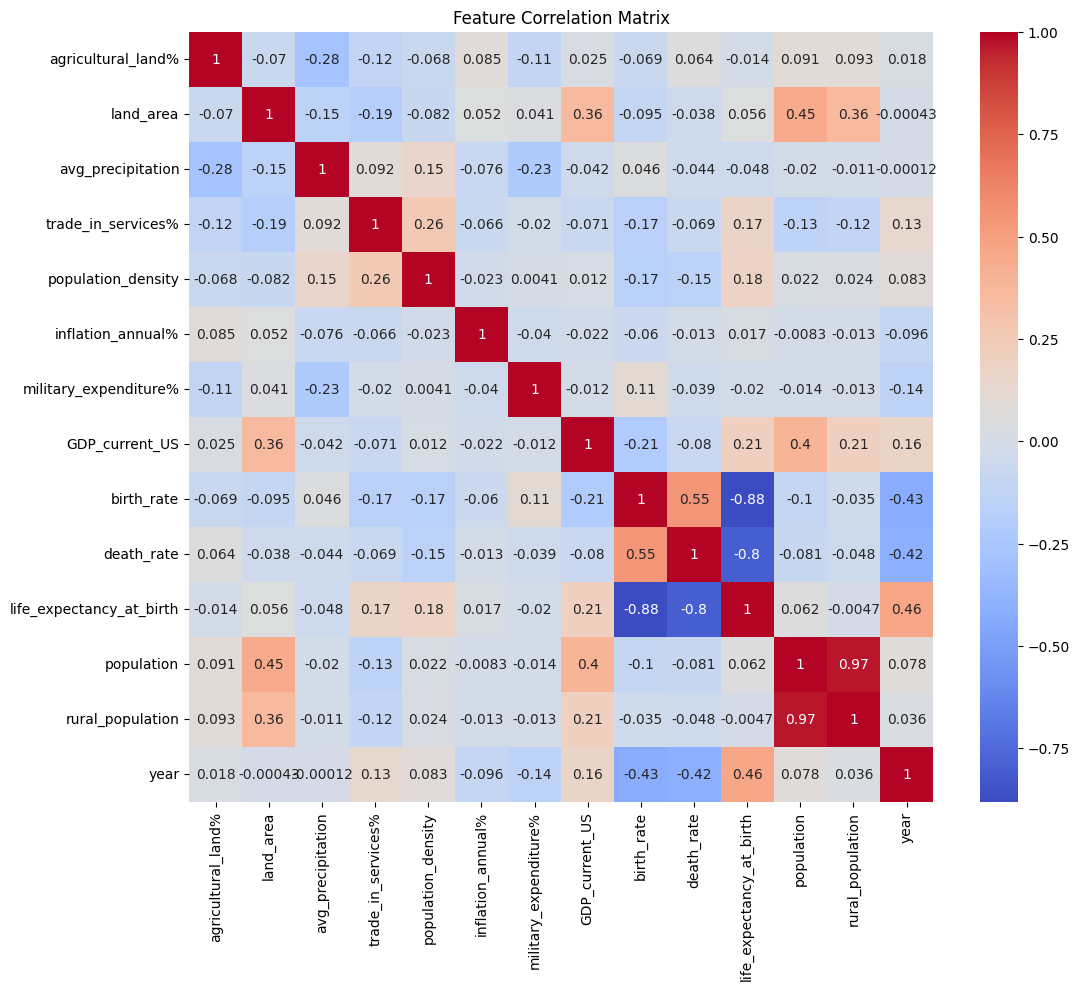

In [29]:
# Select only numeric columns for the correlation matrix
numeric_df = df_final.select_dtypes(include=np.number)

# Create the correlation matrix
corr_matrix = numeric_df.corr()

# Plot a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)
plt.title('Feature Correlation Matrix')
plt.show()

# To see the correlations with GDP specifically
print(corr_matrix['GDP_current_US'].sort_values(ascending=False))

In [30]:
columns_to_drop = ['rural_population', 'land_area', 'agricultural_land%','population_density', 'inflation_annual%', 'birth_rate']
df_final.drop(columns=columns_to_drop, inplace=True)

In [31]:
df_final.head()

,date,avg_precipitation,trade_in_services%,military_expenditure%,GDP_current_US,death_rate,life_expectancy_at_birth,population,month,year,country
0,1960-01-01,327.0,5.941145,1.629606,5.377778e+08,31.921,32.535,8622466.0,January,1960,Afghanistan
1,1961-01-01,327.0,5.941145,1.629606,5.488889e+08,31.349,33.068,8790140.0,January,1961,Afghanistan
2,1962-01-01,327.0,5.941145,1.629606,5.466667e+08,30.845,33.547,8969047.0,January,1962,Afghanistan
3,1963-01-01,327.0,5.941145,1.629606,7.511112e+08,30.359,34.016,9157465.0,January,1963,Afghanistan
4,1964-01-01,327.0,5.941145,1.629606,8.000000e+08,29.867,34.494,9355514.0,January,1964,Afghanistan


In [32]:
df_final.shape

(9920, 11)

In [33]:
df = df_final
df.head()

,date,avg_precipitation,trade_in_services%,military_expenditure%,GDP_current_US,death_rate,life_expectancy_at_birth,population,month,year,country
0,1960-01-01,327.0,5.941145,1.629606,5.377778e+08,31.921,32.535,8622466.0,January,1960,Afghanistan
1,1961-01-01,327.0,5.941145,1.629606,5.488889e+08,31.349,33.068,8790140.0,January,1961,Afghanistan
2,1962-01-01,327.0,5.941145,1.629606,5.466667e+08,30.845,33.547,8969047.0,January,1962,Afghanistan
3,1963-01-01,327.0,5.941145,1.629606,7.511112e+08,30.359,34.016,9157465.0,January,1963,Afghanistan
4,1964-01-01,327.0,5.941145,1.629606,8.000000e+08,29.867,34.494,9355514.0,January,1964,Afghanistan


In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [35]:
X = df.drop(['GDP_current_US', 'country', 'month', 'date', 'year'], axis=1)
y = df['GDP_current_US']

In [36]:
features = X.columns.tolist()
features

['avg_precipitation',
 'trade_in_services%',
 'military_expenditure%',
 'death_rate',
 'life_expectancy_at_birth',
 'population']

In [37]:
#Time-Based Split
split_year = 2016
X_train = X[df_final['year'] < split_year]
X_test = X[df_final['year'] >= split_year]
y_train = y[df_final['year'] < split_year]
y_test = y[df_final['year'] >= split_year]

In [38]:
print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

Training set shape: (8680, 6)
Testing set shape: (1240, 6)


In [39]:
# Important: Fit the scaler ONLY on the training data to prevent data leakage!
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [40]:
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_scaled, y_train)

y_pred = ridge_model.predict(X_test_scaled)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_base.py:288: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_base.py:288: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_base.py:288: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_


In [41]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

In [42]:
print("\n--- Model Evaluation ---")
print(f"Mean Absolute Error (MAE): ${mae:,.2f}")
print(f"Root Mean Squared Error (RMSE): ${rmse:,.2f}")
print(f"R-squared (R²): {r2:.4f}")


--- Model Evaluation ---
Mean Absolute Error (MAE): $503,025,820,495.10
Root Mean Squared Error (RMSE): $1,988,731,435,882.74
R-squared (R²): 0.1971


In [43]:
from sklearn.ensemble import RandomForestRegressor

In [44]:
# n_estimators is the number of trees in the forest.
# random_state=42 ensures the results are reproducible.
# n_jobs=-1 uses all available CPU cores to speed up training.
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)

In [45]:
print("\\nTraining the Random Forest model... (This may take a moment)")
rf_model.fit(X_train, y_train)
print("Training complete.")

\nTraining the Random Forest model... (This may take a moment)


Training complete.


In [46]:
y_pred_rf = rf_model.predict(X_test)

In [47]:
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print("\n--- Random Forest Model Evaluation ---")
print(f"Mean Absolute Error (MAE): ${mae_rf:,.2f}")
print(f"Root Mean Squared Error (RMSE): ${rmse_rf:,.2f}")
print(f"R-squared (R²): {r2_rf:.4f}")


--- Random Forest Model Evaluation ---
Mean Absolute Error (MAE): $154,664,116,621.11
Root Mean Squared Error (RMSE): $879,721,453,635.49
R-squared (R²): 0.8429


In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

Feature importance plot saved as feature_importance.png


/var/folders/71/vjw5zfy17gb69yks2wh_m1qr0000gp/T/ipykernel_83834/1168673462.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')


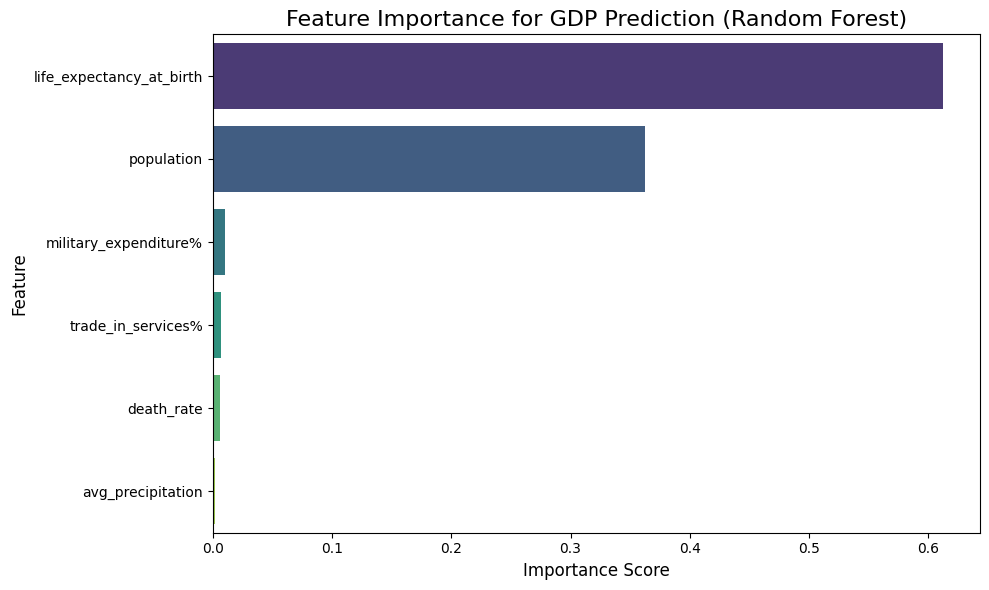

In [49]:
# Extract feature importances
importances = rf_model.feature_importances_

# Create a DataFrame for easier plotting
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')

plt.title('Feature Importance for GDP Prediction (Random Forest)', fontsize=16)
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.tight_layout() # Adjust layout to make sure everything fits
plt.savefig('feature_importance.png')
print("Feature importance plot saved as feature_importance.png")